In [6]:
import enzope as ezp
from enzope.graphs.graph_class import GTG
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy import stats

In [7]:
def custom_distance(u_pos, v_pos):
    # Calculate distance using custom formula for torus-like boundary conditions
    boundary_size = 1
    distance = 0
    for i in range(len(u_pos)):
        delta = abs(u_pos[i] - v_pos[i])
        delta = min(delta, boundary_size - delta)  # Consider the shortest wrap-around distance
        distance += delta ** 2
    return math.sqrt(distance)


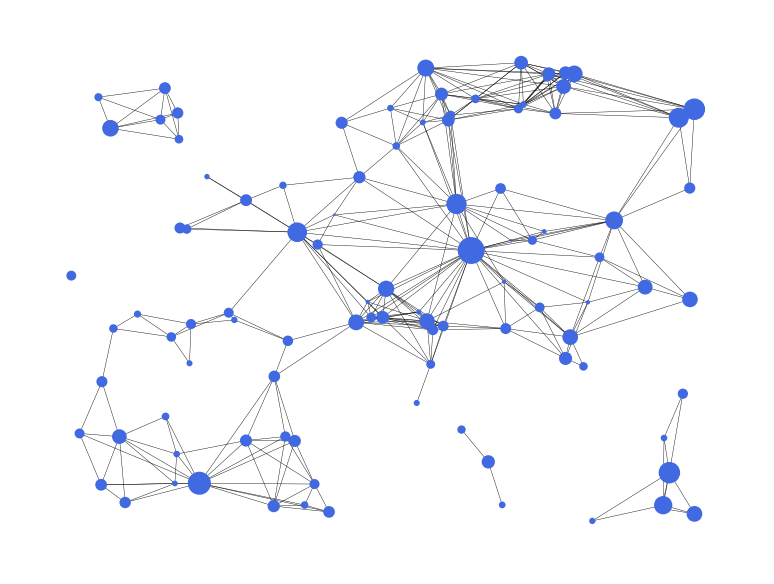

In [8]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10)
gtg2.plot_snapshot()

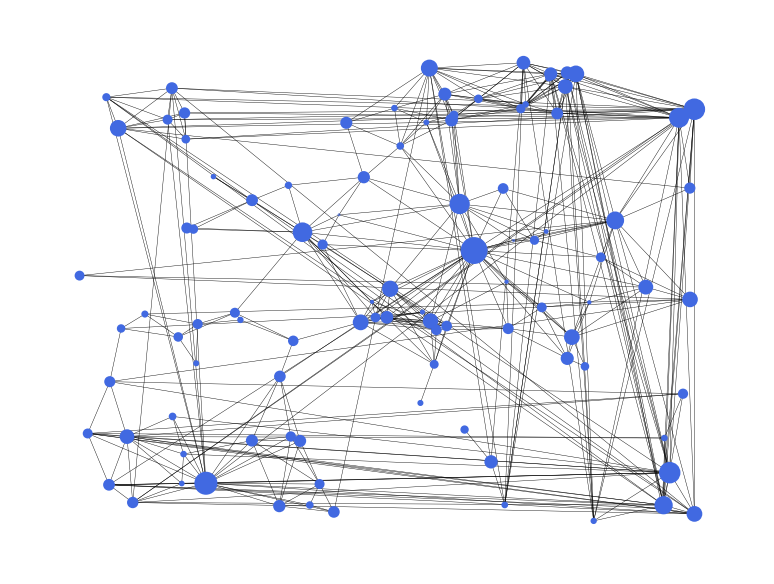

In [9]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10, metric=custom_distance)
gtg2.plot_snapshot()

In [12]:
n_nodes = 10000
gtg = GTG(n_nodes=n_nodes, theta=7000, plotable=True, metric=custom_distance, seed=10)
gtg2 = GTG(n_nodes=n_nodes, theta=7000, plotable=True, metric=custom_distance, join='mul', seed=10)
# gtg.plot_snapshot()

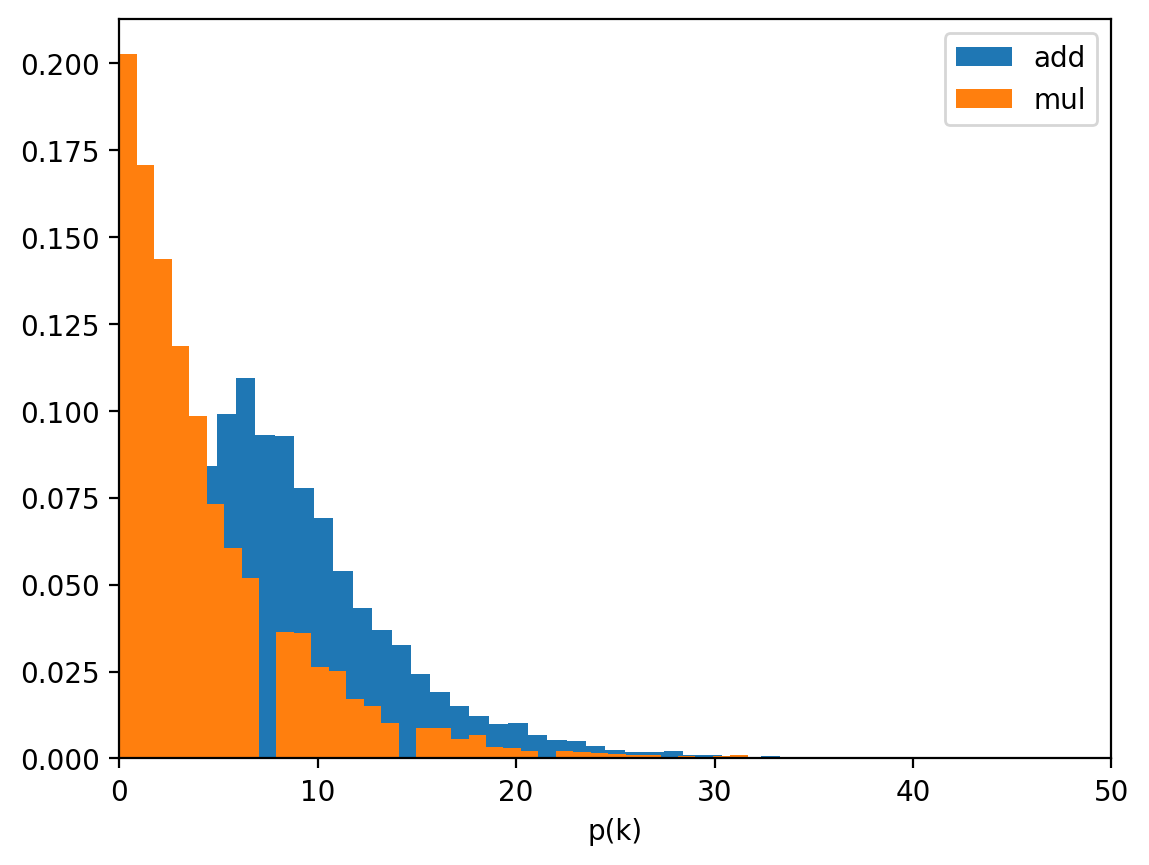

In [23]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()));
n_neighs2 = np.array(list(dict(nx.degree(gtg2.G)).values()));
fig, ax = plt.subplots(dpi=200)
plt.xlim(0, 50)
plt.xlabel('p(k)')
plt.hist(n_neighs, bins=50, density=True, label='add');
plt.hist(n_neighs2, bins=50, density=True, label='mul');
plt.legend()

array([10,  6, 10, ..., 22,  5, 21])

## 13/11: Analisis de GTGs

### Conectividad y small-worldness a $\theta$ fijo

In [47]:
sizes = np.arange(100, 10000, 500)
redes_add = [GTG(n_nodes=size, theta=1000) for size in sizes]
redes_mul = [GTG(n_nodes=size, theta=1000, join='mul') for size in sizes]
ks_add = [redes_add[i].get_mean_connectivity() for i in range(len(redes_add))]
ks_mul = [redes_mul[i].get_mean_connectivity() for i in range(len(redes_mul))]

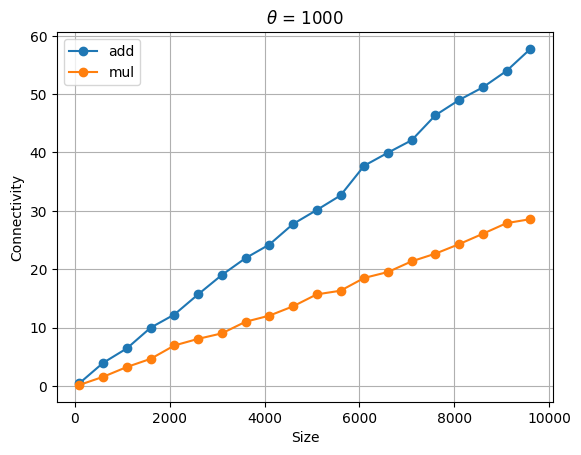

In [70]:
plt.title(r'${\theta}$ = 1000')
plt.plot(sizes, ks_add, label='add', marker='o')
plt.plot(sizes, ks_mul, label='mul', marker='o')
plt.xlabel('Size')
plt.ylabel('Connectivity')
plt.grid()
plt.legend();